# Tema del Proyecto:
### Sistema de Detección y Recomendación para Trastornos del Sueño usando Machine Learning

## Título:
### **Dormir Mejor con Datos: Predicción de Trastornos del Sueño y Recomendaciones Personalizadas**

Este proyecto tiene como objetivo desarrollar un sistema inteligente que permita detectar trastornos del sueño a partir de datos personales, de estilo de vida y clínicos, utilizando algoritmos de aprendizaje automático. El enfoque se basa en un proceso de dos etapas:

1. **Detección binaria:** determinar si una persona presenta o no un trastorno del sueño.
2. **Clasificación del tipo de trastorno:** en caso afirmativo, identificar de qué trastorno se trata (por ejemplo, insomnio, apnea, narcolepsia, etc.).
3. **Segmentación de pacientes (Clustering):** descubrir subgrupos naturales.

Posteriormente, se propone construir una **aplicación de recomendaciones personalizadas**, que, según el tipo de trastorno diagnosticado por el modelo, ofrezca sugerencias prácticas y adaptadas para mejorar la calidad del descanso.

Para llevar a cabo este proyecto, se han utilizado **dos conjuntos de datos de Kaggle**:

- [Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset): contiene datos sobre ocupación, hábitos diarios, duración y calidad del sueño, nivel de estrés, frecuencia cardíaca, IMC, entre otros.

- [Sleep Disorder Diagnostic Dataset](https://www.kaggle.com/datasets/ziya07/sleep-disorder-diagnostic-dataset): aporta datos clínicos como el tipo de trastorno diagnosticado, puntuaciones AHI, niveles de oxígeno en sangre (SaO2) y confirmaciones médicas.

---

## Objetivos del Proyecto:

- **Detectar la presencia de trastornos del sueño:** Predecir si un individuo presenta o no un trastorno, a partir de datos demográficos, de estilo de vida y clínicos.
- **Clasificar el tipo de trastorno:** Si se detecta un trastorno, identificar si se trata de insomnio, apnea del sueño, narcolepsia, síndrome de piernas inquietas, etc.
- **Identificar factores clave:** Analizar qué variables tienen mayor influencia en la aparición de cada tipo de trastorno.
- **Diseñar un sistema de recomendaciones inteligentes:** Proporcionar recomendaciones personalizadas y prácticas para cada paciente, en función del trastorno detectado y sus características individuales.
---

### Variable Objetivo (Target)

- **Etapa 1:** `Tiene_Trastorno` → variable binaria: *Sí / No*
- **Etapa 2:** `Sleep_Disorder` → variable categórica con clases como: *Insomnio*, *Apnea del Sueño*, *Narcolepsia*, *Síndrome de Piernas Inquietas*, etc.
- **Etapa 3:** `Segmentación de pacientes`-  (Clustering) →  Objetivo: descubrir subgrupos naturales (sin target predefinido).
---

### ¿Qué se puede predecir?:

- **Problema de clasificación jerárquica:**
  - **Primera predicción:** si una persona tiene o no un trastorno del sueño.
  - **Segunda predicción (condicional):** en caso afirmativo, determinar el tipo específico de trastorno.
  - **Tercera predicción:** descubrir subgrupos naturales.

- **Relevancia médica y social:**
  - Este enfoque puede facilitar una detección temprana de trastornos del sueño, lo cual es clave para evitar complicaciones médicas, mejorar la calidad de vida y reducir el impacto en la productividad y salud mental.

- **Aplicabilidad práctica:**
  - El modelo servirá como base para una aplicación que no solo prediga el trastorno, sino que también brinde recomendaciones como:
    - Cambios en la rutina del sueño.
    - Ejercicios de relajación.
    - Recomendaciones sobre actividad física, dieta o visitas médicas.
    - Alertas para síntomas que requieren atención profesional.



---

### Importación de librerias

In [510]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA   
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Importar para guardar y cargar el modelo
import pickle

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Carga de datos

In [511]:
df1 = pd.read_csv('../data/sleep_disorder_dataset.csv')

df1

,Patient_ID,Age,Gender,Sleep_Disorder_Type,AHI_Score,SaO2_Level,OCR_Extracted_Text,Diagnosis_Confirmed
0,P0001,54,Female,Restless Leg Syndrome,44.11,77.59,Patient P0001 diagnosed with Restless Leg Synd...,1
1,P0002,17,Female,Restless Leg Syndrome,33.55,76.22,Patient P0002 diagnosed with Restless Leg Synd...,1
2,P0003,74,Male,Insomnia,12.91,89.53,Patient P0003 diagnosed with Insomnia.,1
3,P0004,63,Male,Restless Leg Syndrome,33.73,85.65,Patient P0004 diagnosed with Restless Leg Synd...,1
4,P0005,23,Female,Insomnia,14.84,88.70,Patient P0005 diagnosed with Insomnia.,1
...,...,...,...,...,...,...,...,...
995,P0996,23,Female,Insomnia,41.57,83.14,Patient P0996 diagnosed with Insomnia.,1
996,P0997,49,Female,No Disorder,42.12,84.85,Patient P0997 diagnosed with No Disorder.,1
997,P0998,75,Male,Obstructive Sleep Apnea,18.66,90.08,Patient P0998 diagnosed with Obstructive Sleep...,1
998,P0999,55,Female,Insomnia,31.60,95.04,Patient P0999 diagnosed with Insomnia.,1


In [512]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           1000 non-null   object 
 1   Age                  1000 non-null   int64  
 2   Gender               1000 non-null   object 
 3   Sleep_Disorder_Type  1000 non-null   object 
 4   AHI_Score            1000 non-null   float64
 5   SaO2_Level           1000 non-null   float64
 6   OCR_Extracted_Text   1000 non-null   object 
 7   Diagnosis_Confirmed  1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [513]:
print(df1.columns)

Index(['Patient_ID', 'Age', 'Gender', 'Sleep_Disorder_Type', 'AHI_Score',
       'SaO2_Level', 'OCR_Extracted_Text', 'Diagnosis_Confirmed'],
      dtype='object')


---

In [514]:
df2 = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')
df2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [515]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [516]:
print(df2.columns)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


---

In [517]:
# Hacemos un merge de los dos dataframes
# en base a las columnas 'Age' y 'Gender'
# Se hace un merge a la izquierda para que no se pierdan datos de df1

df_combined = pd.merge(df2, df1, how='left', left_on=['Age', 'Gender'], right_on=['Age', 'Gender'])


In [518]:
df_combined

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Patient_ID,Sleep_Disorder_Type,AHI_Score,SaO2_Level,OCR_Extracted_Text,Diagnosis_Confirmed
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,P0321,Narcolepsy,47.20,98.11,Patient P0321 diagnosed with Narcolepsy.,1
1,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,P0340,Obstructive Sleep Apnea,18.56,91.75,Patient P0340 diagnosed with Obstructive Sleep...,1
2,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,P0489,Insomnia,42.71,78.61,Patient P0489 diagnosed with Insomnia.,1
3,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,P0611,Obstructive Sleep Apnea,27.12,82.61,Patient P0611 diagnosed with Obstructive Sleep...,1
4,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,P0708,Insomnia,49.10,76.13,Patient P0708 diagnosed with Insomnia.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,P0569,Restless Leg Syndrome,4.75,82.91,Patient P0569 diagnosed with Restless Leg Synd...,1
2252,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,P0580,Insomnia,46.55,98.58,Patient P0580 diagnosed with Insomnia.,1
2253,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,P0814,Obstructive Sleep Apnea,14.17,83.15,Patient P0814 diagnosed with Obstructive Sleep...,1
2254,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,P0924,Obstructive Sleep Apnea,33.95,91.90,Patient P0924 diagnosed with Obstructive Sleep...,1


In [519]:
# comprobar los nulos
df_combined.isnull().sum()

Person ID                     0
Gender                        0
Age                           0
Occupation                    0
Sleep Duration                0
Quality of Sleep              0
Physical Activity Level       0
Stress Level                  0
BMI Category                  0
Blood Pressure                0
Heart Rate                    0
Daily Steps                   0
Sleep Disorder             1383
Patient_ID                    0
Sleep_Disorder_Type           0
AHI_Score                     0
SaO2_Level                    0
OCR_Extracted_Text            0
Diagnosis_Confirmed           0
dtype: int64

In [520]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                2256 non-null   int64  
 1   Gender                   2256 non-null   object 
 2   Age                      2256 non-null   int64  
 3   Occupation               2256 non-null   object 
 4   Sleep Duration           2256 non-null   float64
 5   Quality of Sleep         2256 non-null   int64  
 6   Physical Activity Level  2256 non-null   int64  
 7   Stress Level             2256 non-null   int64  
 8   BMI Category             2256 non-null   object 
 9   Blood Pressure           2256 non-null   object 
 10  Heart Rate               2256 non-null   int64  
 11  Daily Steps              2256 non-null   int64  
 12  Sleep Disorder           873 non-null    object 
 13  Patient_ID               2256 non-null   object 
 14  Sleep_Disorder_Type     

In [521]:
df_combined.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,AHI_Score,SaO2_Level,Diagnosis_Confirmed
count,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000
mean,193.944149,42.753546,7.196321,7.433954,58.311170,5.223848,70.064716,6726.462766,26.268324,87.878785,0.856383
std,108.471417,8.703466,0.817139,1.240513,21.057787,1.813470,4.370560,1682.552987,14.999625,7.303265,0.350779
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,0.020000,75.000000,0.000000
25%,101.000000,36.000000,6.400000,6.000000,42.000000,4.000000,68.000000,5000.000000,12.190000,82.060000,1.000000
50%,186.000000,42.000000,7.200000,8.000000,60.000000,5.000000,70.000000,7000.000000,26.600000,87.150000,1.000000
75%,294.000000,50.000000,7.900000,8.000000,75.000000,7.000000,72.000000,8000.000000,38.820000,94.620000,1.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,49.990000,99.940000,1.000000


In [522]:
# Obtener los tipos de datos
print(df_combined.dtypes)

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Patient_ID                  object
Sleep_Disorder_Type         object
AHI_Score                  float64
SaO2_Level                 float64
OCR_Extracted_Text          object
Diagnosis_Confirmed          int64
dtype: object


----------

In [523]:
df_combined[df_combined.duplicated()].head(10)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Patient_ID,Sleep_Disorder_Type,AHI_Score,SaO2_Level,OCR_Extracted_Text,Diagnosis_Confirmed


In [524]:
# combinar las 2 columans de trastornos del sueño
df_combined['Combined_Sleep_Disorder'] = df_combined['Sleep Disorder'].combine_first(df_combined['Sleep_Disorder_Type'])

In [525]:
# Eliminar las columnas originales, ya no hacen falta
df_combined = df_combined.drop(columns=['Sleep Disorder', 'Sleep_Disorder_Type'])

In [526]:
df_combined.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Patient_ID                 0
AHI_Score                  0
SaO2_Level                 0
OCR_Extracted_Text         0
Diagnosis_Confirmed        0
Combined_Sleep_Disorder    0
dtype: int64

In [527]:
# renombrar la columna a Sleep_disorder
df_combined.rename(columns={'Combined_Sleep_Disorder': 'Sleep_disorder'}, inplace=True)

In [528]:
df_combined

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Patient_ID,AHI_Score,SaO2_Level,OCR_Extracted_Text,Diagnosis_Confirmed,Sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,P0321,47.20,98.11,Patient P0321 diagnosed with Narcolepsy.,1,Narcolepsy
1,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,P0340,18.56,91.75,Patient P0340 diagnosed with Obstructive Sleep...,1,Obstructive Sleep Apnea
2,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,P0489,42.71,78.61,Patient P0489 diagnosed with Insomnia.,1,Insomnia
3,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,P0611,27.12,82.61,Patient P0611 diagnosed with Obstructive Sleep...,1,Obstructive Sleep Apnea
4,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,P0708,49.10,76.13,Patient P0708 diagnosed with Insomnia.,1,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,P0569,4.75,82.91,Patient P0569 diagnosed with Restless Leg Synd...,1,Sleep Apnea
2252,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,P0580,46.55,98.58,Patient P0580 diagnosed with Insomnia.,1,Sleep Apnea
2253,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,P0814,14.17,83.15,Patient P0814 diagnosed with Obstructive Sleep...,1,Sleep Apnea
2254,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,P0924,33.95,91.90,Patient P0924 diagnosed with Obstructive Sleep...,1,Sleep Apnea


In [529]:
# Verificar el balance de la columna target 'Sleep Disorder'
print(df_combined['Sleep_disorder'].value_counts(dropna=False))

Sleep_disorder
Insomnia                   757
Obstructive Sleep Apnea    492
Sleep Apnea                490
Restless Leg Syndrome      213
Narcolepsy                 187
No Disorder                117
Name: count, dtype: int64


#### Explicación de Tipos de trastornos
- Insomnia → Insomnio. Dificultad para conciliar el sueño, permanecer dormido o despertarse demasiado temprano y no poder volver a dormir.
- Obstructive Sleep Apnea (OSA) → Apnea Obstructiva del Sueño. Trastorno en el que la respiración se interrumpe repetidamente durante el sueño debido a una obstrucción de las vías respiratorias.
- Slep Apnea → Cualquier tipo de apnea del sueño. (OSA) y (CSA)
- Restless Leg Syndrome → Síndrome de Piernas Inquietas. Trastorno neurológico caracterizado por una necesidad incontrolable de mover las piernas, especialmente por la noche.
- Narcolepsy → Narcolepsia. Trastorno del sueño que provoca somnolencia extrema durante el día y episodios súbitos de sueño.
- No Disorder → Sin Trastorno. Pacientes que no presentan ningún trastorno del sueño diagnosticado.
---

In [530]:
# Eliminar la columna OCR_Extracted_Text, no me aporta información
df_combined = df_combined.drop(columns=['OCR_Extracted_Text'])

In [531]:
# Eliminar la columna Person ID
df_combined = df_combined.drop(columns=['Person ID'])

In [532]:
# Eliminar Patience ID
df_combined = df_combined.drop(columns=['Patient_ID'])

In [533]:
# como AHI_Score y SaO2_Level pueden tener una correlación con el resultado voy a eliminarlas, para evitar overfitting
# y que el modelo no se vea influenciado por estas columnas
df_combined = df_combined.drop(columns=["AHI_Score", "SaO2_Level"])

In [534]:
# 'Sleep_disorder' contiene strings, no números
print(df_combined['Sleep_disorder'].unique())

# Crear y aplicar LabelEncoder
sleep_encoder = LabelEncoder()
df_combined['Sleep_disorder_encoded'] = sleep_encoder.fit_transform(df_combined['Sleep_disorder'])

# Ver mapeo: nombre del trastorno → número
sleep_disorder_mapping = dict(zip(sleep_encoder.classes_, sleep_encoder.transform(sleep_encoder.classes_)))
print("Nombre → Número:")
print(sleep_disorder_mapping)

# Ver mapeo inverso: número → nombre
inverse_mapping = {v: k for k, v in sleep_disorder_mapping.items()}
print("Número → Nombre:")
print(inverse_mapping)


['Narcolepsy' 'Obstructive Sleep Apnea' 'Insomnia' 'Restless Leg Syndrome'
 'Sleep Apnea' 'No Disorder']
Nombre → Número:
{'Insomnia': np.int64(0), 'Narcolepsy': np.int64(1), 'No Disorder': np.int64(2), 'Obstructive Sleep Apnea': np.int64(3), 'Restless Leg Syndrome': np.int64(4), 'Sleep Apnea': np.int64(5)}
Número → Nombre:
{np.int64(0): 'Insomnia', np.int64(1): 'Narcolepsy', np.int64(2): 'No Disorder', np.int64(3): 'Obstructive Sleep Apnea', np.int64(4): 'Restless Leg Syndrome', np.int64(5): 'Sleep Apnea'}


- Nombre → Número:
{
    'Insomnia': 0,
    'Narcolepsy': 1,
    'No Disorder': 2,
    'Obstructive Sleep Apnea': 3,
    'Restless Leg Syndrome': 4,
    'Sleep Apnea': 5
}

- Número → Nombre:
{
    0: 'Insomnia',
    1: 'Narcolepsy',
    2: 'No Disorder',
    3: 'Obstructive Sleep Apnea',
    4: 'Restless Leg Syndrome',
    5: 'Sleep Apnea'
}

In [535]:
# Comprobación de los tipos de datos
print(df_combined.dtypes)

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Diagnosis_Confirmed          int64
Sleep_disorder              object
Sleep_disorder_encoded       int64
dtype: object


In [536]:
df_combined

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Diagnosis_Confirmed,Sleep_disorder,Sleep_disorder_encoded
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,1,Narcolepsy,1
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,1,Obstructive Sleep Apnea,3
2,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,1,Insomnia,0
3,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,1,Obstructive Sleep Apnea,3
4,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,1,Insomnia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1,Sleep Apnea,5
2252,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1,Sleep Apnea,5
2253,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1,Sleep Apnea,5
2254,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1,Sleep Apnea,5


In [537]:
# Identificar columnas categóricas
categorical_columns = df_combined.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a cada columna categórica
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_combined[column] = le.fit_transform(df_combined[column])
    label_encoders[column] = le

# Verificar la conversión
print(df_combined.head())

   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           9             6.1                 6   
1       1   27           9             6.1                 6   
2       1   27           9             6.1                 6   
3       1   27           9             6.1                 6   
4       1   27           9             6.1                 6   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                       42             6             3              11   
1                       42             6             3              11   
2                       42             6             3              11   
3                       42             6             3              11   
4                       42             6             3              11   

   Heart Rate  Daily Steps  Diagnosis_Confirmed  Sleep_disorder  \
0          77         4200                    1               1   
1          77         4200          

In [538]:
# La columna Sleep disorder encoded eliminarla, ya no es necesaria
df_combined = df_combined.drop(columns=['Sleep_disorder_encoded'])

In [539]:
df_combined


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Diagnosis_Confirmed,Sleep_disorder
0,1,27,9,6.1,6,42,6,3,11,77,4200,1,1
1,1,27,9,6.1,6,42,6,3,11,77,4200,1,3
2,1,27,9,6.1,6,42,6,3,11,77,4200,1,0
3,1,27,9,6.1,6,42,6,3,11,77,4200,1,3
4,1,27,9,6.1,6,42,6,3,11,77,4200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,0,59,5,8.1,9,75,3,3,23,68,7000,1,5
2252,0,59,5,8.1,9,75,3,3,23,68,7000,1,5
2253,0,59,5,8.1,9,75,3,3,23,68,7000,1,5
2254,0,59,5,8.1,9,75,3,3,23,68,7000,1,5


In [540]:
print(df_combined.dtypes)

Gender                       int64
Age                          int64
Occupation                   int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                 int64
Blood Pressure               int64
Heart Rate                   int64
Daily Steps                  int64
Diagnosis_Confirmed          int64
Sleep_disorder               int64
dtype: object


In [541]:
# Guardar el dataframe combinado
df_combined.to_csv('../data/combined_sleep_dataset.csv', index=False)

In [542]:
df_combined

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Diagnosis_Confirmed,Sleep_disorder
0,1,27,9,6.1,6,42,6,3,11,77,4200,1,1
1,1,27,9,6.1,6,42,6,3,11,77,4200,1,3
2,1,27,9,6.1,6,42,6,3,11,77,4200,1,0
3,1,27,9,6.1,6,42,6,3,11,77,4200,1,3
4,1,27,9,6.1,6,42,6,3,11,77,4200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,0,59,5,8.1,9,75,3,3,23,68,7000,1,5
2252,0,59,5,8.1,9,75,3,3,23,68,7000,1,5
2253,0,59,5,8.1,9,75,3,3,23,68,7000,1,5
2254,0,59,5,8.1,9,75,3,3,23,68,7000,1,5


---

In [543]:
# Ver cuántas filas tienen exactamente los mismos valores
print("Duplicados exactos:", df_combined.duplicated().sum())

# Ver cuántas filas tienen mismos Age + Gender (pero podrían diferir en otras)
print("Duplicados parciales por Age + Gender:", df_combined.duplicated(subset=['Age', 'Gender']).sum())


Duplicados exactos: 1893
Duplicados parciales por Age + Gender: 2210


In [544]:
df_combined 

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Diagnosis_Confirmed,Sleep_disorder
0,1,27,9,6.1,6,42,6,3,11,77,4200,1,1
1,1,27,9,6.1,6,42,6,3,11,77,4200,1,3
2,1,27,9,6.1,6,42,6,3,11,77,4200,1,0
3,1,27,9,6.1,6,42,6,3,11,77,4200,1,3
4,1,27,9,6.1,6,42,6,3,11,77,4200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,0,59,5,8.1,9,75,3,3,23,68,7000,1,5
2252,0,59,5,8.1,9,75,3,3,23,68,7000,1,5
2253,0,59,5,8.1,9,75,3,3,23,68,7000,1,5
2254,0,59,5,8.1,9,75,3,3,23,68,7000,1,5


#### Análisis Univariante

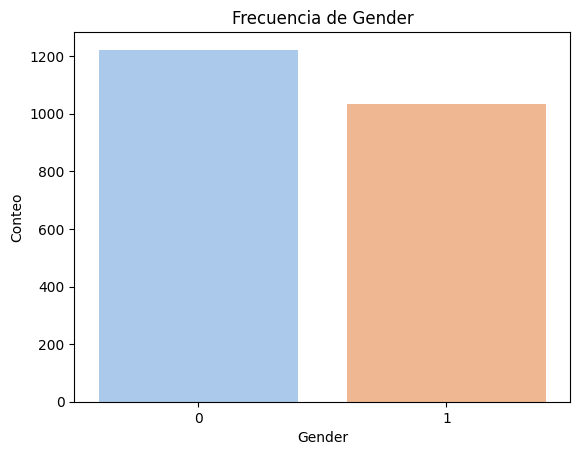

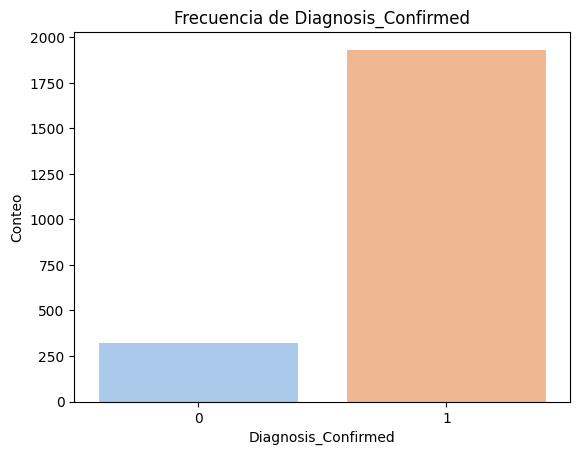


Conteo de Gender:
 Gender
0    1222
1    1034
Name: count, dtype: int64

Conteo de Diagnosis_Confirmed:
 Diagnosis_Confirmed
1    1932
0     324
Name: count, dtype: int64


In [545]:
# Lista de variables 
cat_cols = ['Gender', 'Diagnosis_Confirmed']

# Gráficos de barras para variables 
for col in cat_cols:
    plt.figure()
    sns.countplot(data=df_combined, x=col, palette='pastel')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks()
    plt.show()

# Conteo de categorías
for col in cat_cols:
    print(f"\nConteo de {col}:\n", df_combined[col].value_counts())


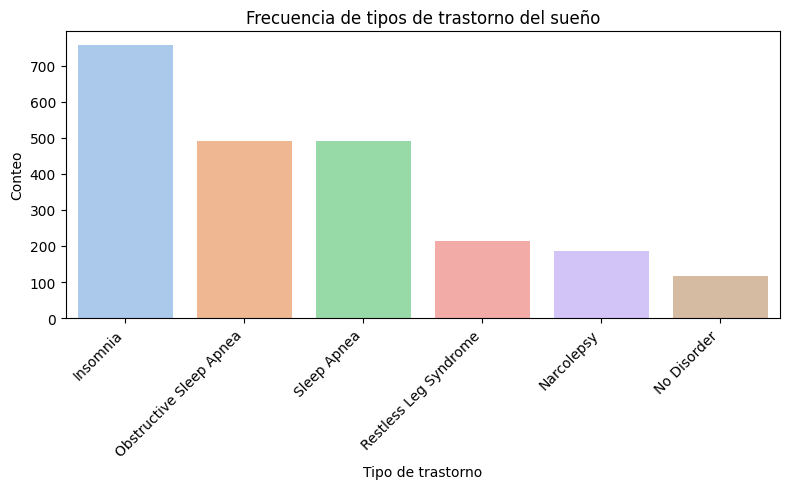

Conteo de cada categoría:
Sleep_disorder_lbl
Insomnia                   757
Obstructive Sleep Apnea    492
Sleep Apnea                490
Restless Leg Syndrome      213
Narcolepsy                 187
No Disorder                117
Name: count, dtype: int64


In [546]:
# Visualizar Sleep disorder

# 2. Definir mapeos
num2name = {
    0: 'Insomnia',
    1: 'Narcolepsy',
    2: 'No Disorder',
    3: 'Obstructive Sleep Apnea',
    4: 'Restless Leg Syndrome',
    5: 'Sleep Apnea'
}

# 3. Mapear la columna
df_combined['Sleep_disorder_lbl'] = df_combined['Sleep_disorder'].map(num2name)

# 4. Gráfico de barras ordenado por frecuencia
plt.figure(figsize=(8,5))
order = df_combined['Sleep_disorder_lbl'].value_counts().index
sns.countplot(data=df_combined, x='Sleep_disorder_lbl', order=order, palette='pastel')
plt.title('Frecuencia de tipos de trastorno del sueño')
plt.xlabel('Tipo de trastorno')
plt.ylabel('Conteo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Mostrar conteos
print("Conteo de cada categoría:")
print(df_combined['Sleep_disorder_lbl'].value_counts())

In [ ]:
# Correlación univariante

# Definir X_num y y usando df_combined
X_num = df_combined.drop(columns=['Sleep_disorder', 'Sleep_disorder_lbl'])
y = df_combined['Sleep_disorder']

corrs = {}
for col in X_num.columns:
    corrs[col] = np.corrcoef(X_num[col], y)[0,1]
corr_series = pd.Series(corrs).abs().sort_values(ascending=False)

print("Top 10 features por correlación absoluta con target:")
print(corr_series.head(10))

Top 10 features por correlación absoluta con target:
Physical Activity Level    0.366577
Blood Pressure             0.316648
Age                        0.290425
Gender                     0.276693
Daily Steps                0.250201
Heart Rate                 0.222166
BMI Category               0.179680
Sleep Duration             0.081841
Quality of Sleep           0.077606
Diagnosis_Confirmed        0.040625
dtype: float64


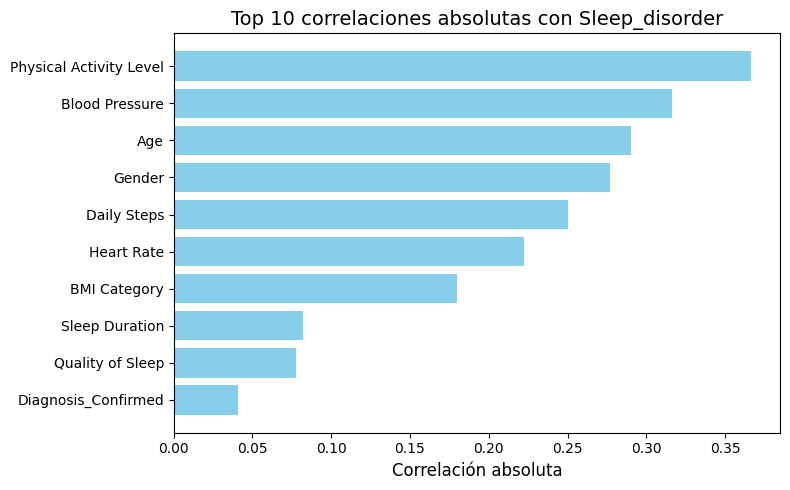

In [555]:
#    Eliminamos la columna target y columnas no numéricas del set de features
X_num = df_combined.drop(columns=['Sleep_disorder', 'Sleep_disorder_lbl'])
y = df_combined['Sleep_disorder']

# 4. Calcular correlación punto-biserial (valor absoluto)
corrs = {col: np.corrcoef(X_num[col], y)[0,1] 
         for col in X_num.columns}
corr_series = pd.Series(corrs).abs().sort_values(ascending=False)

# 5. Seleccionar top 10
top10 = corr_series.head(10)

# 6. Graficar
plt.figure(figsize=(8, 5))
plt.barh(top10.index[::-1], top10.values[::-1], color='skyblue')
plt.title('Top 10 correlaciones absolutas con Sleep_disorder', fontsize=14)
plt.xlabel('Correlación absoluta', fontsize=12)
plt.tight_layout()
plt.show()

----

### Análisis Bivariante

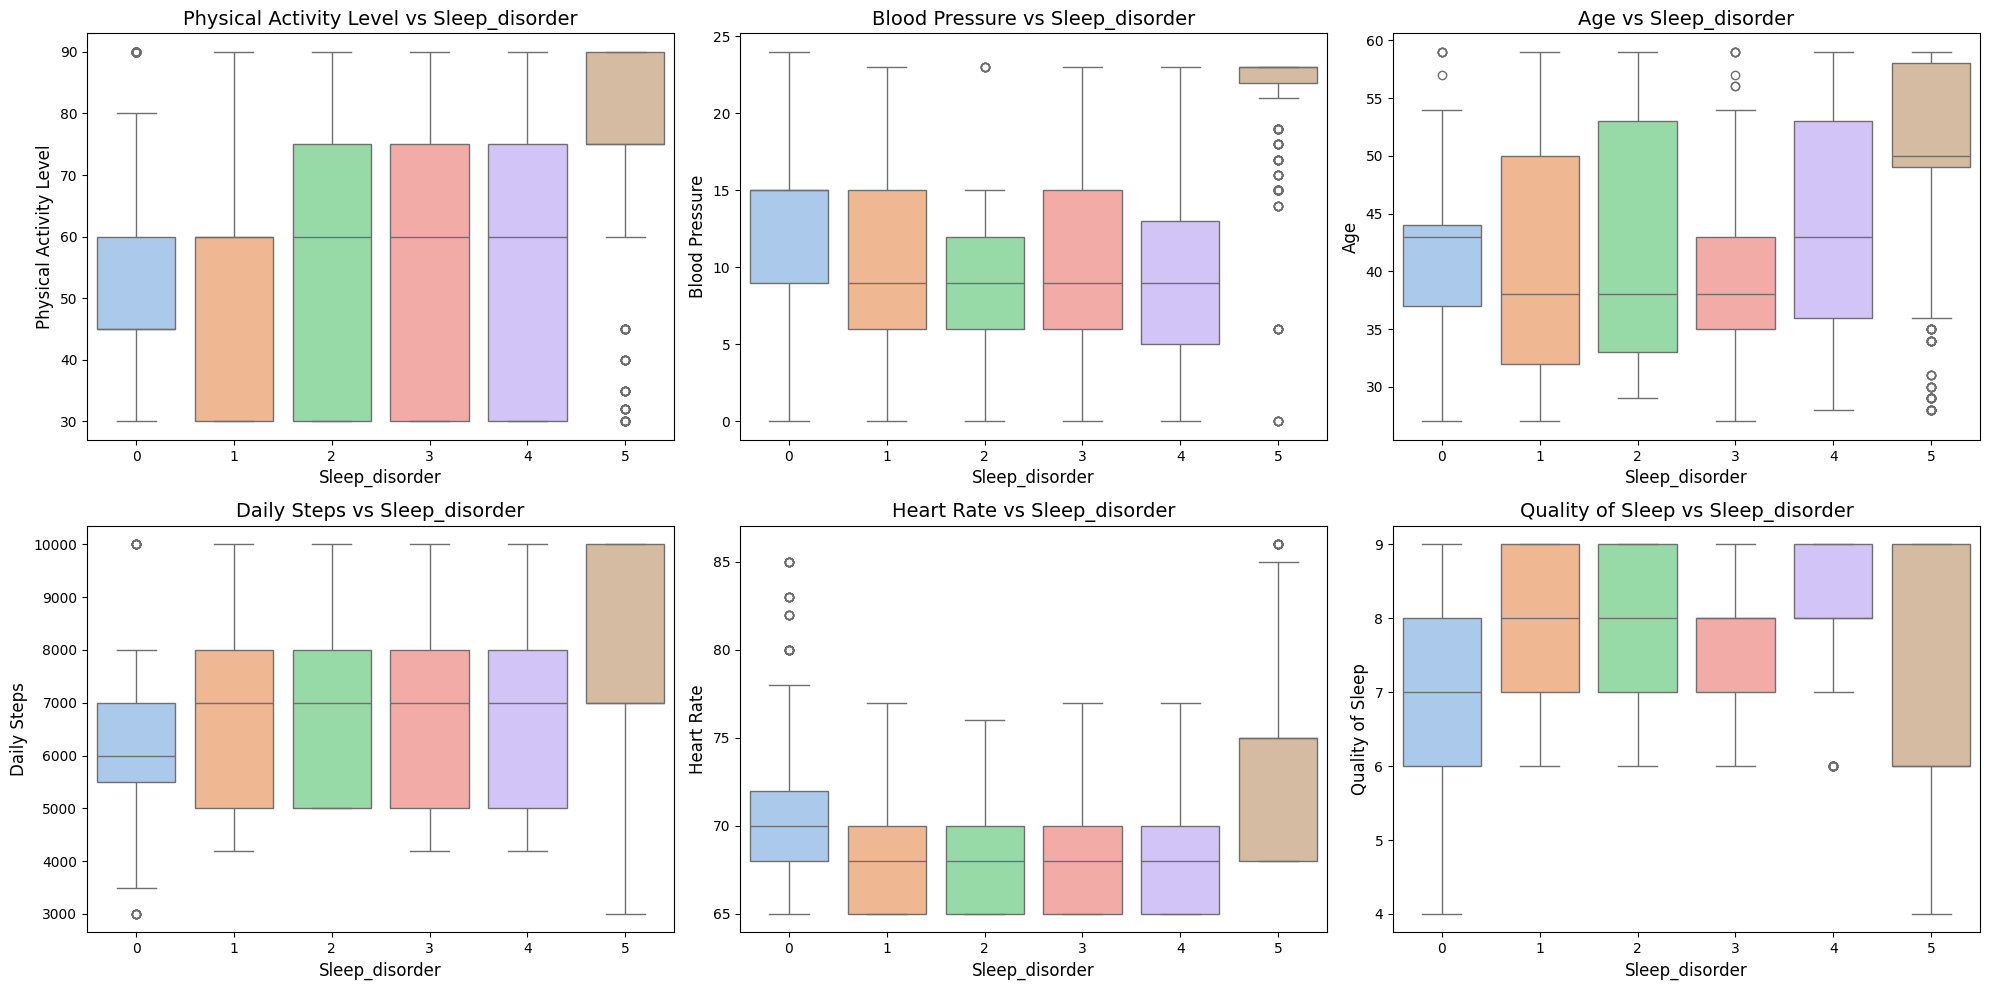

In [559]:
# Definir lista de pares (target vs feature)
pairs = [
    ('Sleep_disorder', 'Physical Activity Level'),
    ('Sleep_disorder', 'Blood Pressure'),
    ('Sleep_disorder', 'Age'),
    ('Sleep_disorder', 'Daily Steps'),
    ('Sleep_disorder', 'Heart Rate'),
    ('Sleep_disorder', 'Quality of Sleep')
]

# Crear figura y ejes
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

# 4. Dibujar un boxplot para cada par
for ax, (y_col, x_col) in zip(axes, pairs):
    sns.boxplot(
        data=df_combined,
        x=y_col,
        y=x_col,
        palette='pastel',
        ax=ax
    )
    ax.set_title(f'{x_col} vs {y_col}', fontsize=14)
    ax.set_xlabel(y_col, fontsize=12)
    ax.set_ylabel(x_col, fontsize=12)

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

    0: 'Insomnia',
    1: 'Narcolepsy',
    2: 'No Disorder',
    3: 'Obstructive Sleep Apnea',
    4: 'Restless Leg Syndrome',
    5: 'Sleep Apnea'

Estos son los puntos clave que se aprecian en los seis boxplots de feature vs. Sleep_disorder:

- Physical Activity Level
    - El grupo 5 (“Sleep Apnea”) muestra la mediana más alta y mayor dispersión, indicando que estos pacientes tienden a niveles de actividad física más elevados y variables.

- Blood Pressure
    - Para los trastornos 0–4 las medianas rondan 9–12.
    - En el nivel 5, la mediana sube por encima de 22 y aparecen valores extremos altos, confirmando que la presión arterial es mucho mayor en quienes tienen Sleep Apnea.

- Age
    - Grupos 0–4 tienen medianas de 33–38 años.
    - El grupo 5 destaca por ser el más mayor (mediana ≈ 50 años) y con un rango de edades más amplio.

- Daily Steps
    - En niveles 0–4, la mediana de pasos diarios se sitúa entre ~5 500 y ~7 000.
    - El grupo 5 también tiene mediana similar (~7 000), pero con más outliers extremos (hacia 3 000 y hasta 10 000 pasos).

- Heart Rate
    - Para trastornos 0–4 la mediana está cerca de 67–69 bpm.
    - En el nivel 5, la mediana sube a ~75 bpm, señalando ritmo cardíaco más alto en Sleep Apnea.

- Quality of Sleep
    - Todos los grupos tienen medianas de 7–8.
    - El nivel 0 (“Insomnia”) muestra la calidad más baja (mediana ~7), mientras que los demás rondan ~8–9.

**Los pacientes con Sleep Apnea (5) tienden a ser mayores, con presión arterial y frecuencia cardíaca más altas, y muestran altos niveles de actividad física (aunque con mucha variabilidad). En cambio, quienes tienen Insomnia (0) presentan la peor calidad de sueño y medianas de edad y salud cardiovascular más moderadas.**

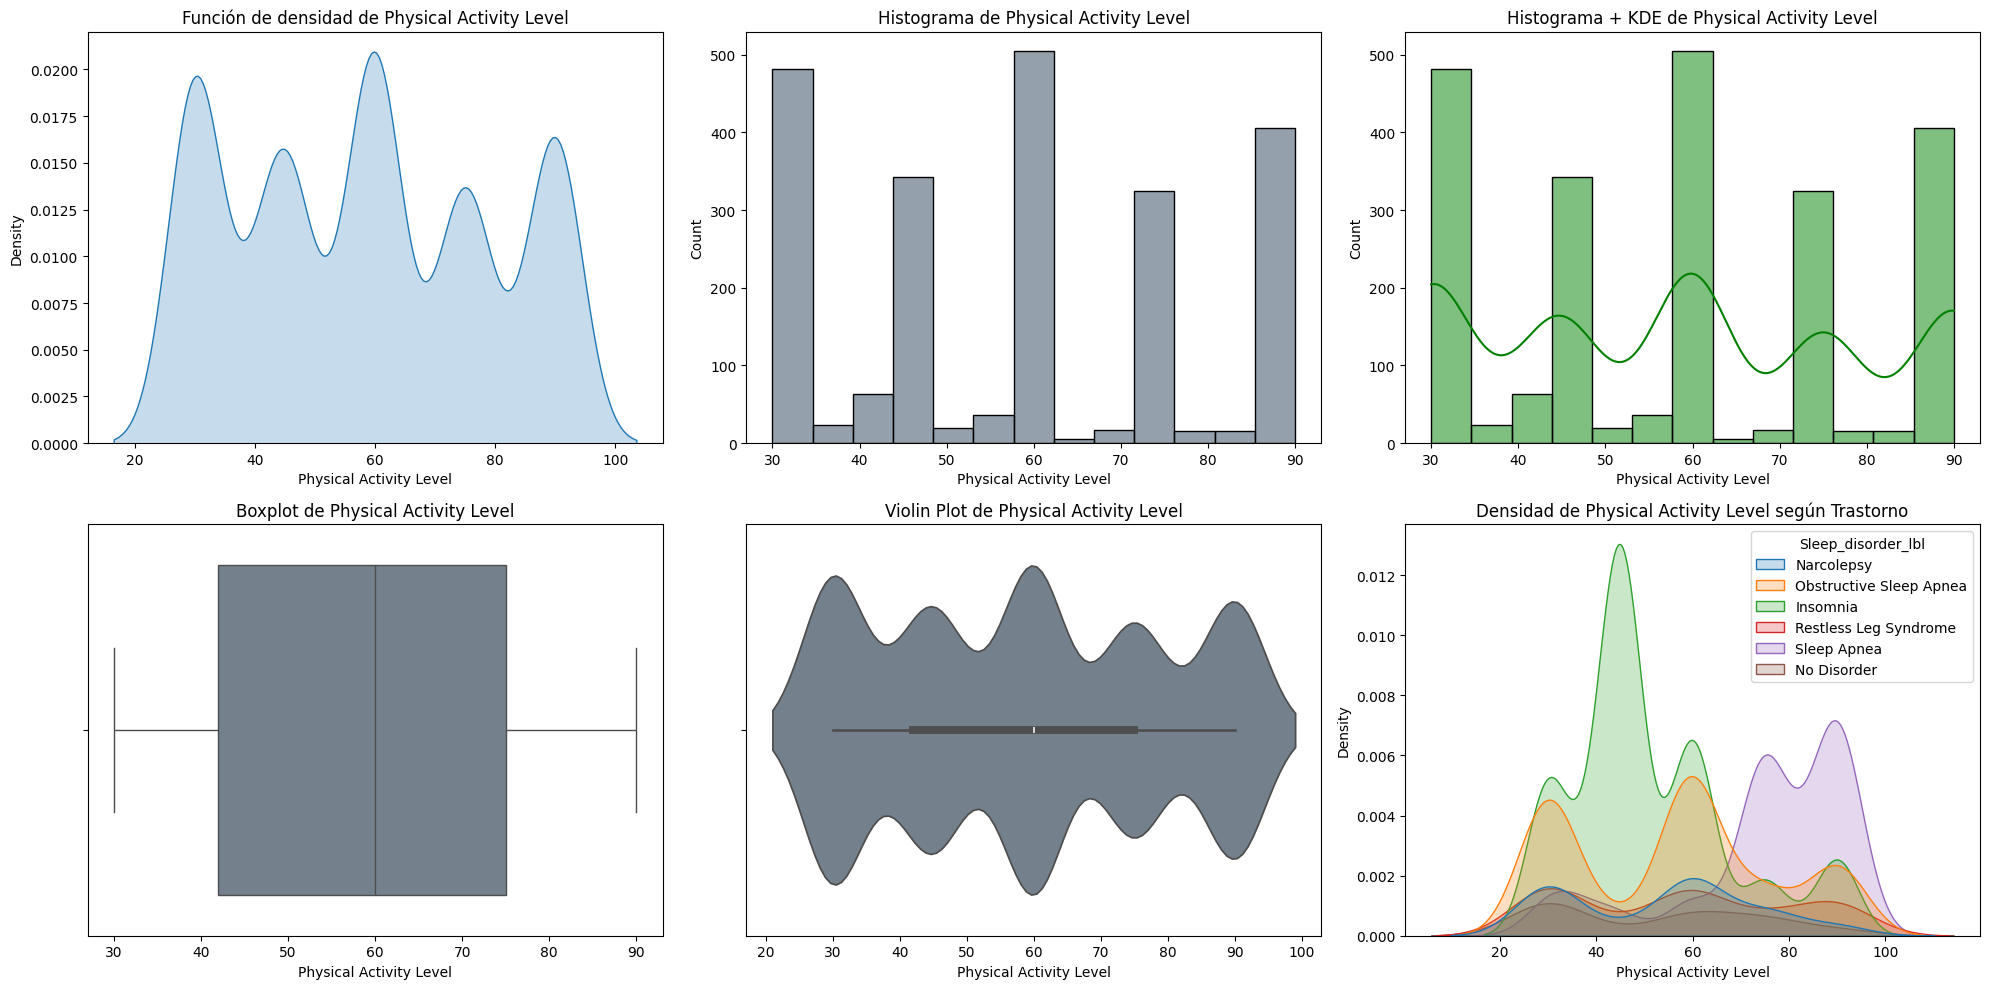

In [558]:
# Crear una figura de subplots (2 filas, 3 columnas)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# -----------------------------------------
# 3. KDE simple de Physical Activity Level
sns.kdeplot(df_combined['Physical Activity Level'], fill=True, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad de Physical Activity Level")

# -----------------------------------------
# 4. Histograma solo
sns.histplot(df_combined['Physical Activity Level'], kde=False, color='slategray', ax=axes[0, 1])
axes[0, 1].set_title("Histograma de Physical Activity Level")

# -----------------------------------------
# 5. Histograma + KDE
sns.histplot(df_combined['Physical Activity Level'], kde=True, color='green', ax=axes[0, 2])
axes[0, 2].set_title("Histograma + KDE de Physical Activity Level")

# -----------------------------------------
# 6. Boxplot
sns.boxplot(x=df_combined['Physical Activity Level'], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Boxplot de Physical Activity Level")

# -----------------------------------------
# 7. Violin plot
sns.violinplot(x=df_combined['Physical Activity Level'], color="slategray", ax=axes[1, 1])
axes[1, 1].set_title("Violin Plot de Physical Activity Level")

# -----------------------------------------
# 8. KDE por tipo de trastorno de sueño
sns.kdeplot(
    data=df_combined,
    x='Physical Activity Level',
    hue='Sleep_disorder_lbl',
    fill=True,
    ax=axes[1, 2]
)
axes[1, 2].set_title("Densidad de Physical Activity Level según Trastorno")

# Ajustes finales
plt.tight_layout()
plt.show()


### Análisis de “Physical Activity Level”

1. **Función de densidad (KDE) global**  
   - Aparecen múltiples picos alrededor de ~30, ~40, ~60, ~75 y ~90.  
   - Indica que no hay una sola “campana”, sino varios subgrupos de actividad.

2. **Histograma global**  
   - Refleja en barras los mismos grupos: gran número de pacientes con PAL cerca de 30–35, 50–60, 80–90, etc.

3. **Histograma + KDE**  
   - Combina barras y curva para reforzar los picos y mostrar con claridad las zonas de más densidad.

4. **Boxplot**  
   - La mediana global está alrededor de **60** pasos de actividad.  
   - El rango intercuartílico va aproximadamente de **40** a **75**.  
   - Los bigotes se extienden desde ~30 hasta ~90, confirmando la gran variabilidad.

5. **Violin plot**  
   - Muestra la misma multimodalidad que el KDE, pero reflejada simétricamente.  
   - Los “cuellos” estrechos corresponden a rangos con poca densidad (e.g., 20–30 y 70–80).

6. **KDE por trastorno**  
   Cada tipo de sueño pinta su propia curva:  
   - **Insomnia** (verde): pico principal en ~40–55.  
   - **Obstructive Sleep Apnea** (naranja): más concentración en ~30–50.  
   - **Sleep Apnea** (lila): desplaza su pico a valores altos (~65–100), reflejando que estos pacientes son los más activos.  
   - **Narcolepsy**, **Restless Leg Syndrome** y **No Disorder** tienen distribuciones intermedias que confirman diferencias en los patrones de actividad.

#### Conclusión general

- La actividad física no está distribuida de manera uniforme, sino que forma **grupos bien diferenciados**.  
- Al segmentar por tipo de trastorno, se observa que quienes padecen **Sleep Apnea** tienden a los valores más altos de actividad (picos en 70–100), mientras que **Insomnia** y **Obstructive Sleep Apnea** tienen medianas más bajas (30–60).  
- Estos patrones sugieren que la **“Physical Activity Level”** podría ser un buen predictor o factor asociado al tipo de trastorno del sueño.  


---

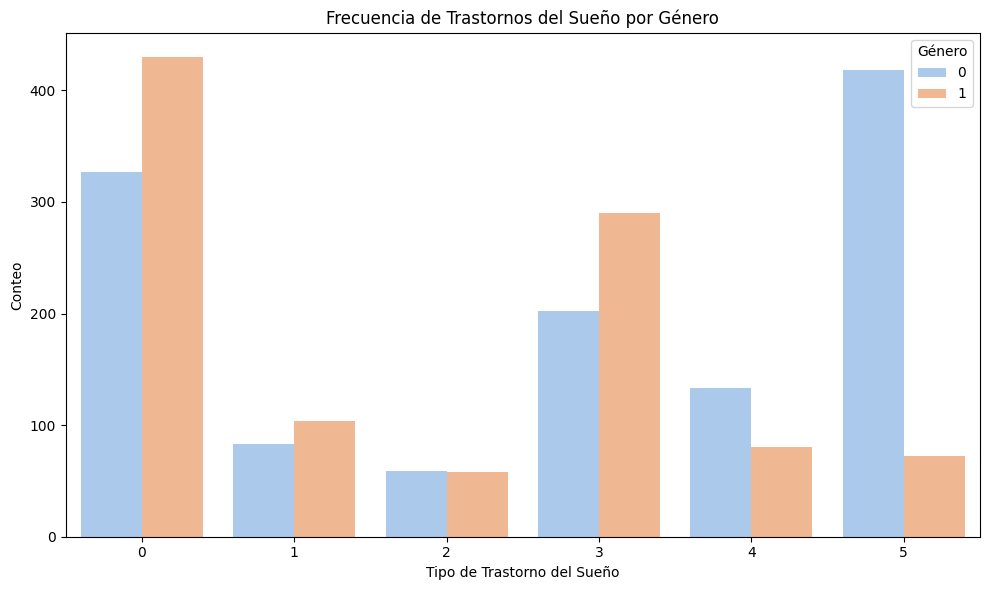

In [549]:
# Género vs. Tipo de Trastorno

plt.figure(figsize=(10, 6))
sns.countplot(data=df_combined, x='Sleep_disorder', hue='Gender', palette='pastel')
plt.title('Frecuencia de Trastornos del Sueño por Género')
plt.xlabel('Tipo de Trastorno del Sueño')
plt.ylabel('Conteo')
plt.legend(title='Género')

plt.tight_layout()
plt.show()

- 0: Insomic
- 1: Narcolepsy
- 2: No Disorder
- 3 Apnea (OSA)
- 4: Leg Syndrome
- 5: Sleep Apnea

---

### Análisis Multivariante

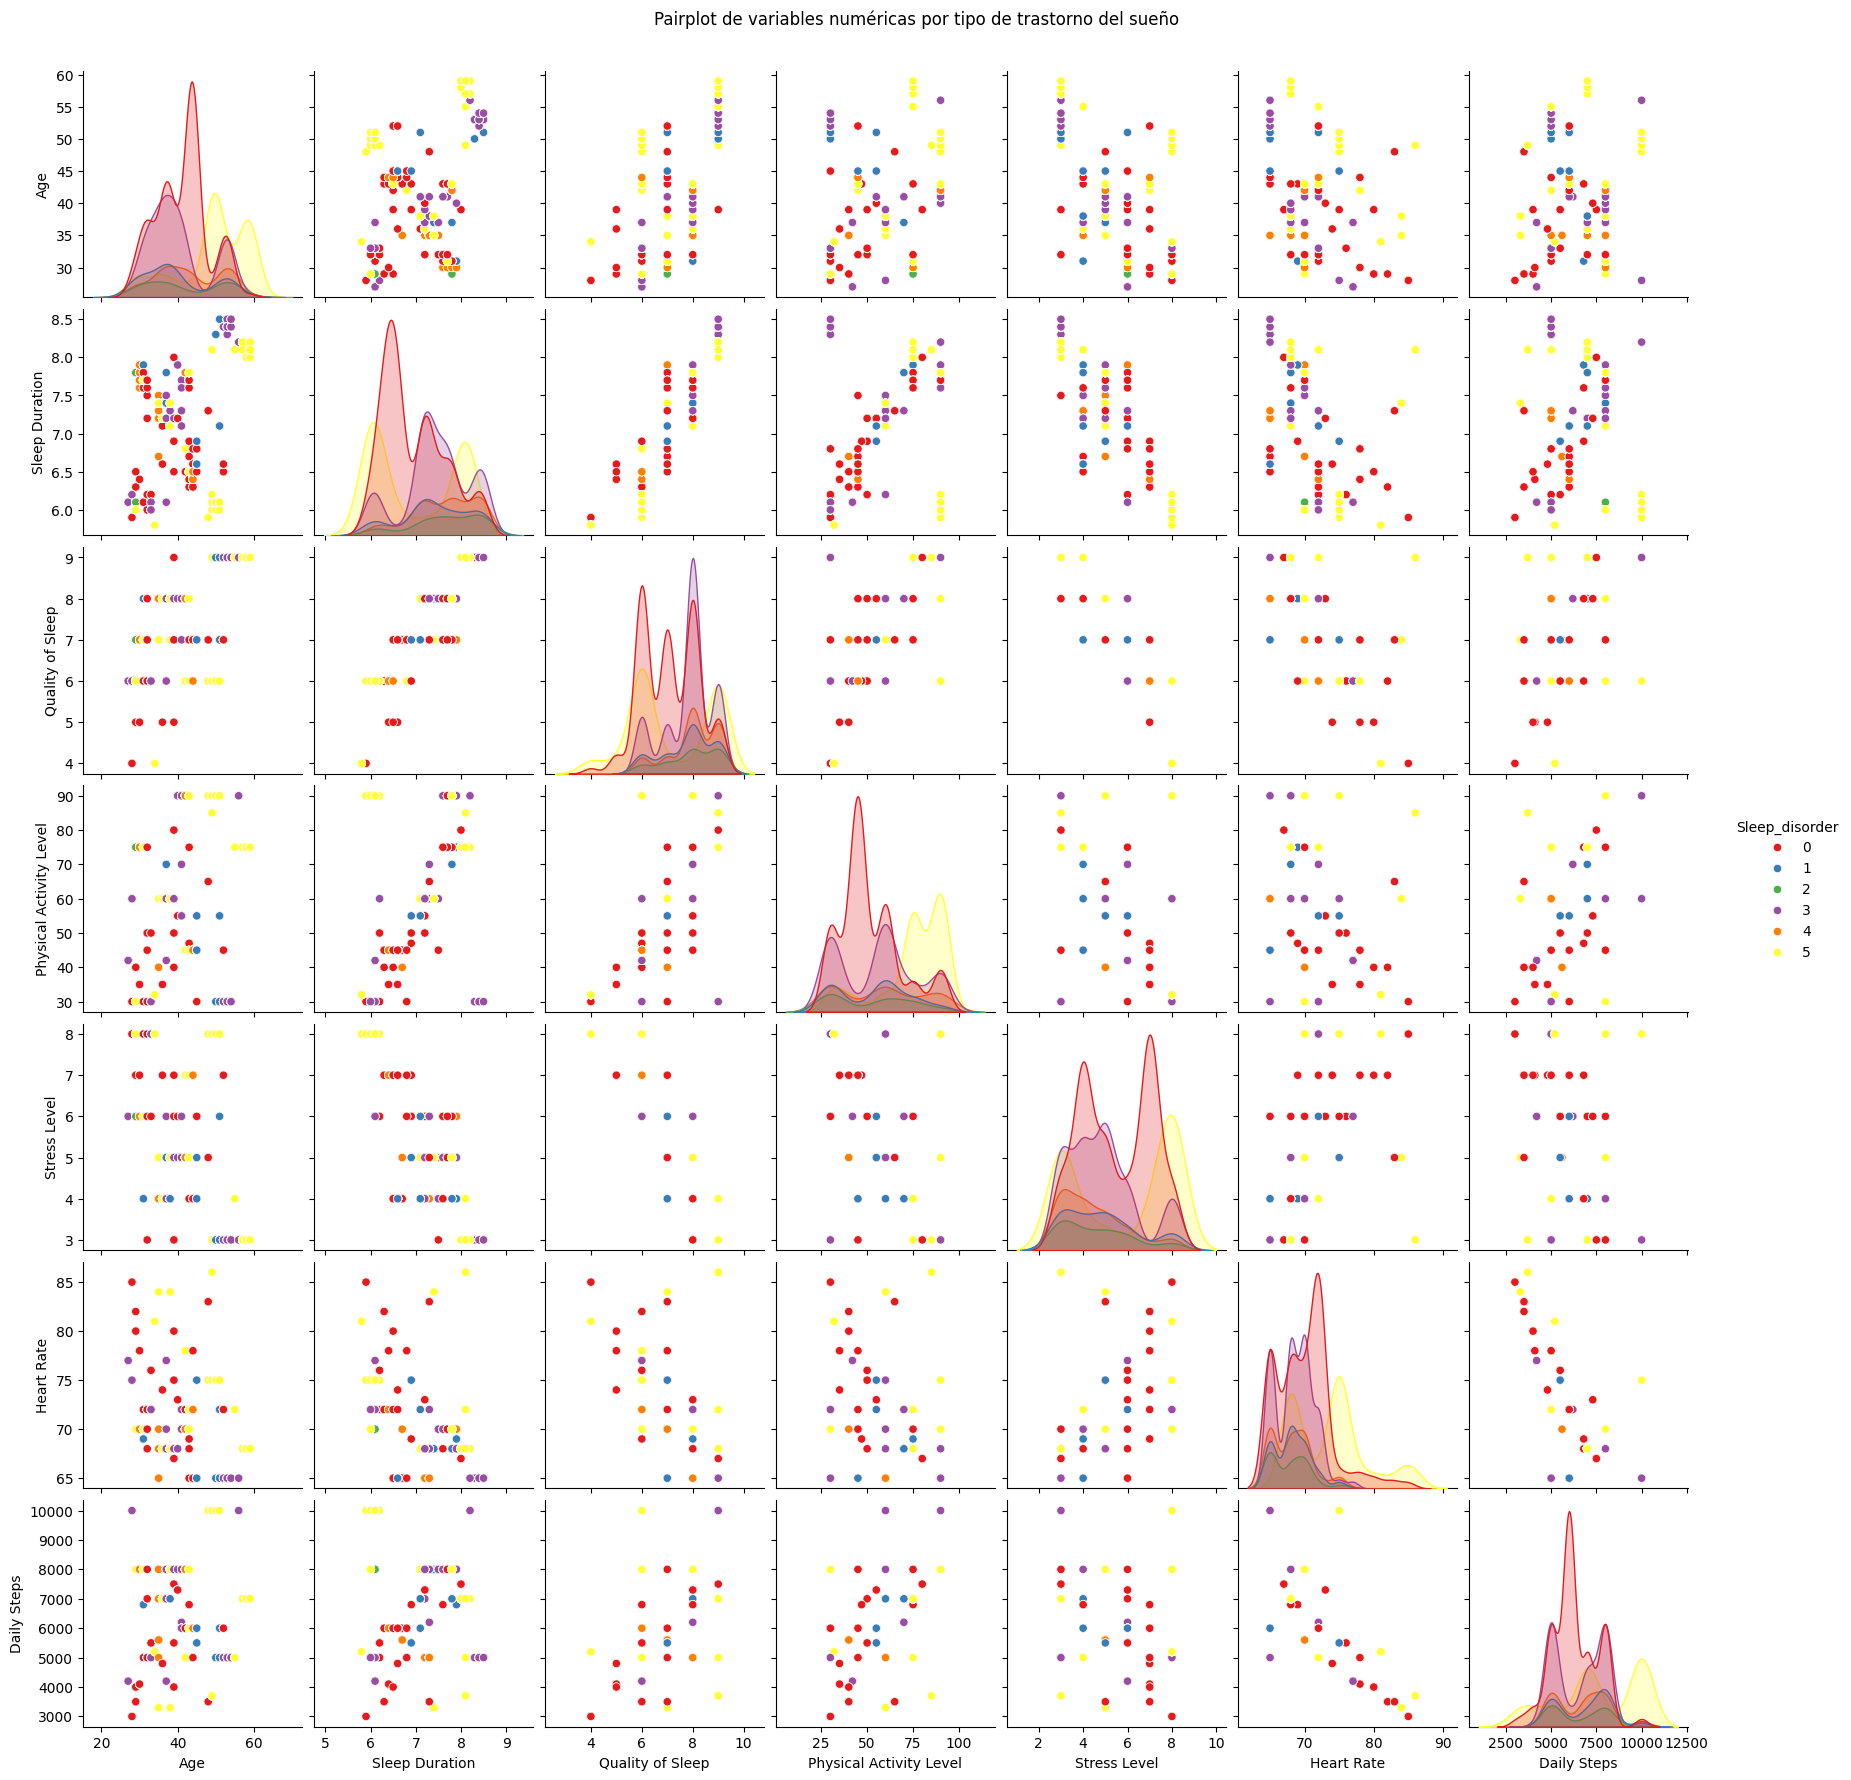

In [562]:
# pairplot
num_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

# Pairplot de las variables coloreado por tipo de trastorno del sueño
sns.pairplot(df_combined[num_cols + ['Sleep_disorder']], hue='Sleep_disorder', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot de variables numéricas por tipo de trastorno del sueño', y=1.02)
plt.show()

### Puntos importantes del Pairplot

- **Edad vs Sleep_disorder**  
  - Pacientes con **Sleep Apnea** (código 5, amarillo) son claramente los más mayores.  
  - **Insomnia** (0, rojo) y **Narcolepsy** (1, azul) tienden a edades más jóvenes.

- **Sleep Duration vs Sleep_disorder**  
  - **Insomnia** muestra duraciones de sueño más cortas (concentración en 5–6 h).  
  - **No Disorder** y **Sleep Apnea** tienen duraciones más largas (6–9 h).

- **Quality of Sleep vs Sleep_disorder**  
  - Calidad de sueño más baja en **Insomnia** (valores 4–7).  
  - **Sleep Apnea** y **No Disorder** se agrupan en calidad alta (7–9).

- **Physical Activity Level & Daily Steps**  
  - Fuerte correlación positiva entre ambas (pocos puntos bajos y altos coincidentes).  
  - **Sleep Apnea** sobresale con los valores más altos de actividad y pasos diarios.

- **Stress Level vs Sleep_disorder**  
  - Todos los trastornos oscilan en estrés moderado (5–7).  
  - Ligeramente más altos en **Restless Leg Syndrome** (código 4, violeta).

- **Heart Rate vs Sleep_disorder**  
  - Ritmo cardíaco mayor en **Sleep Apnea** (70–85 bpm).  
  - Resto de grupos en rangos similares (65–75 bpm).

- **Relaciones bivariantes generales**  
  - **Sleep Duration** y **Quality of Sleep** van de la mano: a más horas, mejor calidad.  
  - **Physical Activity Level**, **Daily Steps** y **Heart Rate** tienden a correlacionarse positivamente.

#### Conclusión 

**Sleep Apnea (5)** forma un subgrupo con:
- Mayor edad  
- Mayor actividad física y pasos diarios  
- Ritmo cardíaco más alto  

**Insomnia (0)** agrupa a:
- Pacientes más jóvenes  
- Menos horas de sueño  
- Peor calidad de sueño  

Las demás variables presentan patrones intermedios y coherentes con estos extremos.  


---

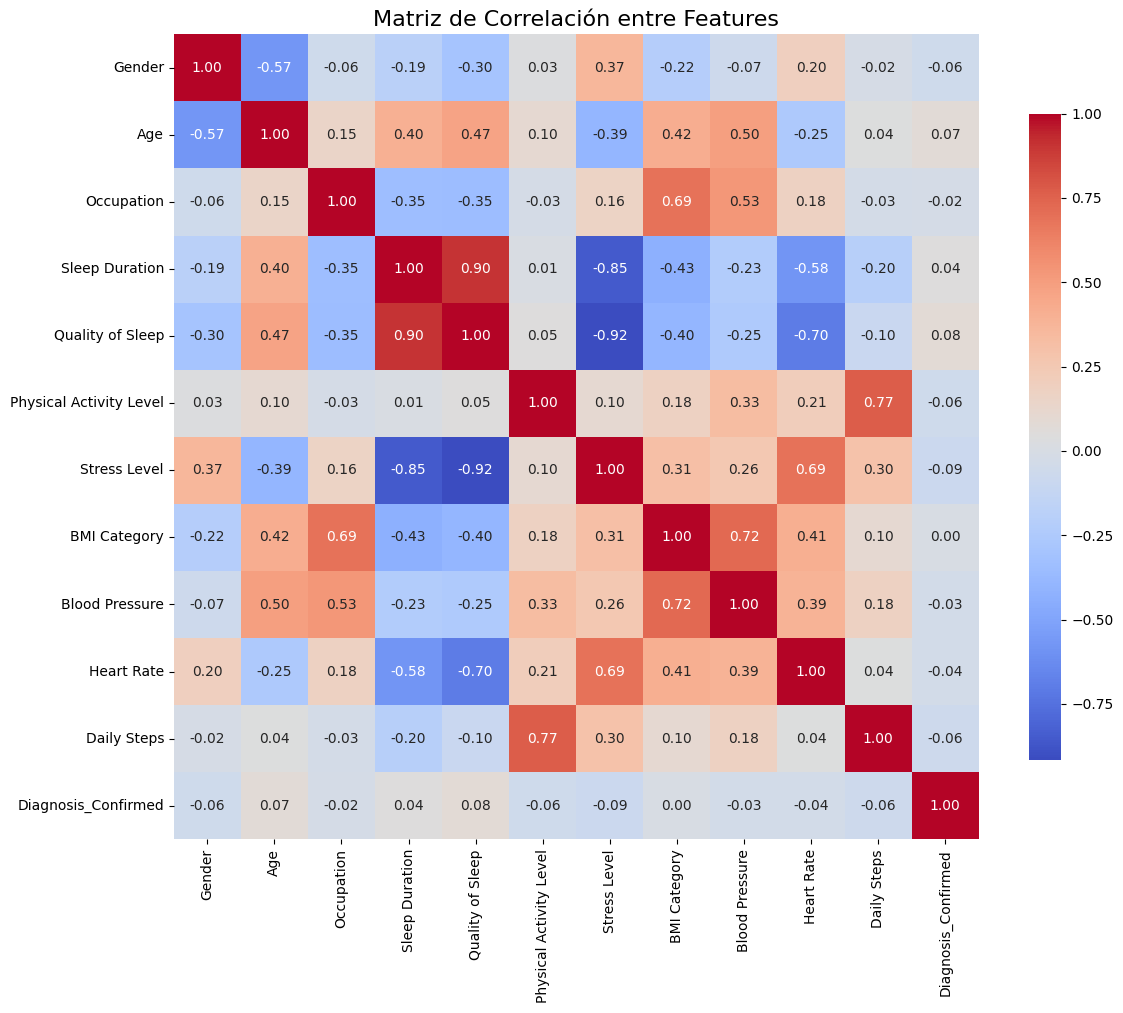

In [563]:
# Matriz de correlación
corr = X_num.corr()

# 4. Visualizar con un heatmap
plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title("Matriz de Correlación entre Features", fontsize=16)
plt.tight_layout()
plt.show()

#### Interpretación de la Matriz de Correlación

- **Sleep Duration & Quality of Sleep (0.90)**  
  Muy fuerte correlación positiva: a más horas de sueño, mejor calidad percibida.

- **Quality of Sleep & Stress Level (–0.92)**  
  Muy fuerte correlación negativa: a mayor estrés, peor calidad de sueño.

- **Sleep Duration & Stress Level (–0.85)**  
  Fuerte correlación negativa: más estrés implica menos horas dormidas.

- **Daily Steps & Physical Activity Level (0.77)**  
  Fuerte positiva: quienes caminan más pasos diarios suelen tener mayor nivel de actividad física.

- **BMI Category & Blood Pressure (0.72)**  
  Alta positiva: categorías de IMC más elevadas se asocian a mayor presión arterial.

- **Heart Rate & Stress Level (0.69)**  
  Moderada–alta positiva: a mayor estrés, frecuencia cardíaca más elevada.

- **Age**  
  - Con **Blood Pressure (0.50)**: presión arterial tiende a subir con la edad.  
  - Con **Quality of Sleep (0.47)**: ligera mejora de la calidad de sueño en edades mayores.  
  - Con **Heart Rate (–0.25)**: ritmo cardiaco ligeramente menor en pacientes más viejos.

- **Otras relaciones destacables**  
  - **Occupation & BMI Category (0.69)**: ciertos empleos se asocian a diferentes categorías de IMC.  
  - **Diagnosis_Confirmed**: correlaciones cercanas a cero con casi todas las variables, indicando poca relación lineal.

**Conclusión**  
- Hay **bloques claros** de variables que se mueven juntas (p. ej., sueño ↔ estrés; actividad ↔ pasos).  
- Estas relaciones ayudan a identificar **patrones** y posibles **confusores** antes de construir modelos predictivos.  


---